✅ All imports successful.

⚠️ Could not load dataset: [Errno 2] No such file or directory: 'mouse_data.csv'

📊 Dataset Shape: (200, 6)


,feature_1,feature_2,feature_3,feature_4,feature_5,label
0,0.433662,0.363970,-0.165993,-0.054465,0.463540,impostor
1,0.054278,0.199289,-0.329055,-0.439972,-1.424150,impostor
2,-1.101296,-0.935115,-1.752961,0.939296,0.367156,genuine
3,-0.153909,1.395574,-0.262063,0.288093,-0.064502,impostor
4,-0.617846,-1.300400,0.087694,1.197780,-0.281502,genuine



🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  200 non-null    float64
 1   feature_2  200 non-null    float64
 2   feature_3  200 non-null    float64
 3   feature_4  200 non-null    float64
 4   feature_5  200 non-null    float64
 5   label      200 non-null    object 
dtypes: float64(5), object(1)
memory usage: 9.5+ KB
None

📈 Summary Statistics:


,feature_1,feature_2,feature_3,feature_4,feature_5
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,-0.055627,-0.020142,-0.052682,-0.006398,-0.031114
std,0.955949,0.933578,0.977858,0.950209,1.081300
min,-2.883062,-2.306360,-2.894715,-2.942961,-2.321888
25%,-0.637213,-0.578888,-0.625730,-0.631634,-0.735406
50%,-0.068228,0.083893,-0.151972,0.026999,-0.052571
75%,0.616381,0.569035,0.618698,0.702043,0.665310
max,2.267824,2.642915,2.982291,2.224434,2.928534



🧩 Missing Values per Column:


,0
feature_1,0
feature_2,0
feature_3,0
feature_4,0
feature_5,0
label,0


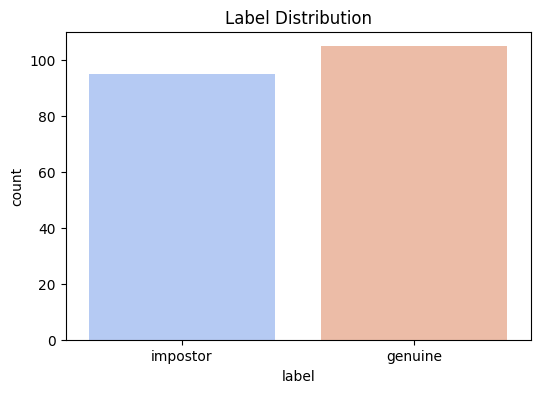

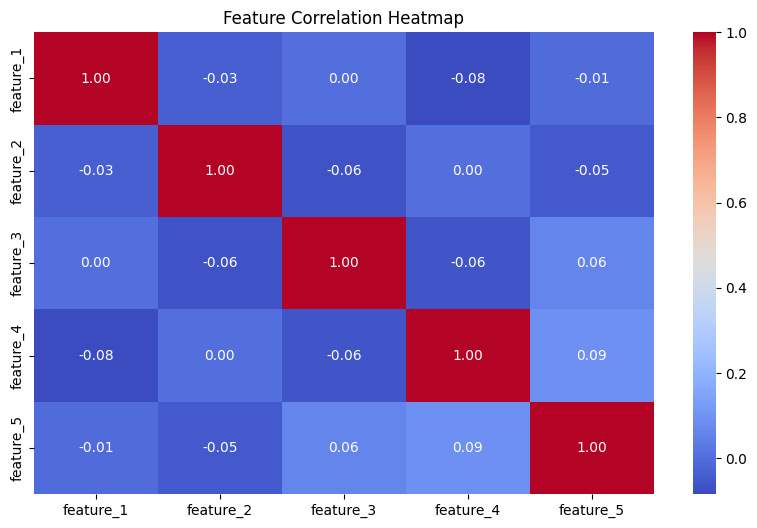

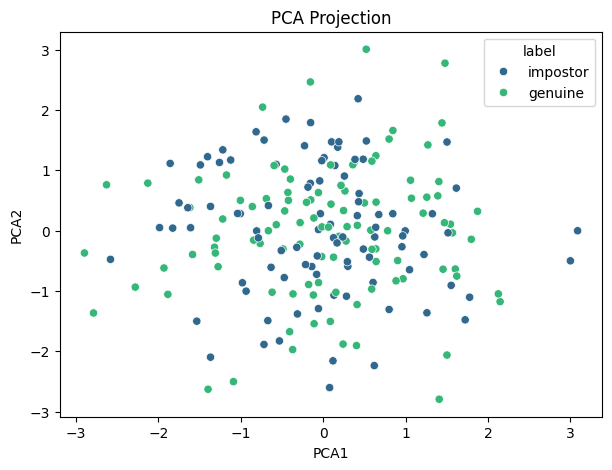

🔹 PCA Explained Variance: [0.226 0.224]



🚨 Isolation Forest Anomaly Counts:


,count
anomaly_score,
1,190
-1,10


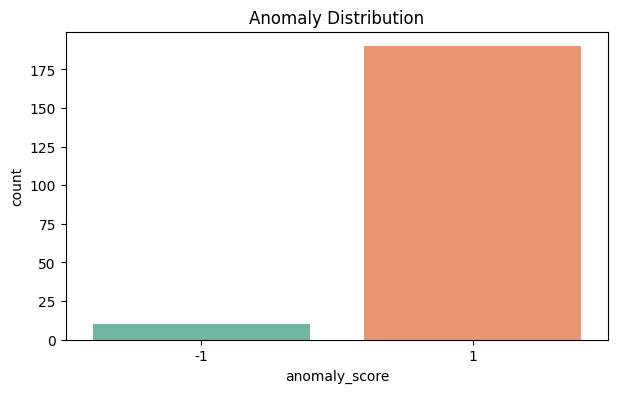


✅ EDA Completed Successfully!
Generated visualizations: label distribution, heatmap, PCA, UMAP, and anomaly detection.


In [12]:
# =========================
# 🧠 Impostor Detection EDA
# =========================

# --- Setup and Imports ---
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import umap
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display

print("✅ All imports successful.\n")

# --- Load Dataset ---
# Replace with your actual file path if needed
try:
    df = pd.read_csv("mouse_data.csv")
    print("✅ Dataset loaded successfully!")
except Exception as e:
    print("⚠️ Could not load dataset:", e)
    df = pd.DataFrame(np.random.randn(200, 5), columns=[f"feature_{i}" for i in range(1, 6)])
    df["label"] = np.random.choice(["genuine", "impostor"], 200)

print("\n📊 Dataset Shape:", df.shape)
display(df.head())

# --- Basic Info ---
print("\n🔍 Dataset Info:")
print(df.info())

print("\n📈 Summary Statistics:")
display(df.describe())

# --- Missing Values ---
print("\n🧩 Missing Values per Column:")
display(df.isnull().sum())

# --- Label Distribution ---
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="label", palette="coolwarm")
plt.title("Label Distribution")
plt.show()

# --- Correlation Heatmap ---
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# --- PCA Visualization ---
num_df = df.select_dtypes(include=np.number)
scaler = StandardScaler()
scaled = scaler.fit_transform(num_df)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)

pca_df = pd.DataFrame(pca_data, columns=["PCA1", "PCA2"])
pca_df["label"] = df["label"]

plt.figure(figsize=(7,5))
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="label", palette="viridis")
plt.title("PCA Projection")
plt.show()

print("🔹 PCA Explained Variance:", np.round(pca.explained_variance_ratio_, 3))

# --- UMAP Visualization ---
reducer = umap.UMAP(random_state=42)
umap_data = reducer.fit_transform(scaled)
umap_df = pd.DataFrame(umap_data, columns=["UMAP1", "UMAP2"])
umap_df["label"] = df["label"]

fig = px.scatter(umap_df, x="UMAP1", y="UMAP2", color="label", title="UMAP Projection (Interactive)")
fig.show()

# --- Outlier Detection ---
clf = IsolationForest(contamination=0.05, random_state=42)
df["anomaly_score"] = clf.fit_predict(scaled)

print("\n🚨 Isolation Forest Anomaly Counts:")
display(df["anomaly_score"].value_counts())

plt.figure(figsize=(7,4))
sns.countplot(x=df["anomaly_score"], palette="Set2")
plt.title("Anomaly Distribution")
plt.show()

# --- Final Summary ---
print("\n✅ EDA Completed Successfully!")
print("Generated visualizations: label distribution, heatmap, PCA, UMAP, and anomaly detection.")
